# Plot the distribution of selected models

In [1]:
import pandas as pd
import glob
import os
import sys
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [15]:
# get the model training results
model_training_results = glob.glob("/scratch/users/nphill22/projects/corsello_lab/20240424_automl_workflow/output/baseline_automl/*/training_details.csv")

In [16]:
# load all
train_results = []
for f in tqdm(model_training_results):
    drug_name = os.path.basename(os.path.dirname(f))
    df = pd.read_csv(f)
    df['drug_name'] = drug_name
    train_results.append(df)

100%|██████████| 6373/6373 [00:27<00:00, 234.41it/s]


In [17]:
df = pd.concat(train_results)

Text(0.5, 1.0, 'Model distribution')

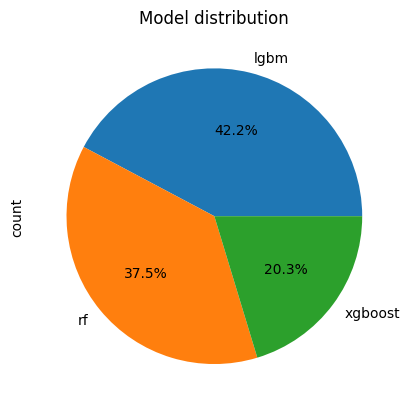

In [21]:
# make a pie chart of model name, add annotationes with value
fig, ax = plt.subplots()
df['model_name'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax)
plt.title("Model distribution")

(0.0, 100.0)

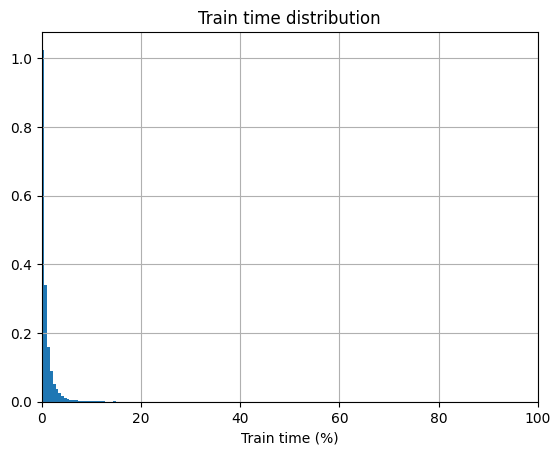

In [28]:
# distribution of train_time, histogram, normalized
fig, ax = plt.subplots()
df['train_time'].hist(bins=300, ax=ax, density=True)
plt.title("Train time distribution")
plt.xlabel("Train time (%)")
# limit x axis to 100
plt.xlim(0, 100)

In [32]:
df.head()

,model_name,train_time,n_estimators,num_leaves,min_child_samples,learning_rate,log_max_bin,colsample_bytree,reg_alpha,reg_lambda,max_features,max_leaves,min_child_weight,subsample,colsample_bylevel,drug_name
0,lgbm,0.023796,56,7.0,16.0,0.025757,4.0,0.135058,0.070005,0.001927,NaN,NaN,NaN,NaN,NaN,alfacalcidol_2.53
1,lgbm,0.165176,150,4.0,8.0,0.048872,9.0,1.000000,0.002202,0.434558,NaN,NaN,NaN,NaN,NaN,alfacalcidol_2.53
2,rf,0.550724,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,40.0,NaN,NaN,NaN,alfacalcidol_2.53
3,rf,0.811019,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.778594,24.0,NaN,NaN,NaN,alfacalcidol_2.53
4,lgbm,1.210220,457,11.0,4.0,0.032303,7.0,0.832202,0.022958,0.045758,NaN,NaN,NaN,NaN,NaN,alfacalcidol_2.53


Text(0.5, 1.0, 'min_child_samples distribution')

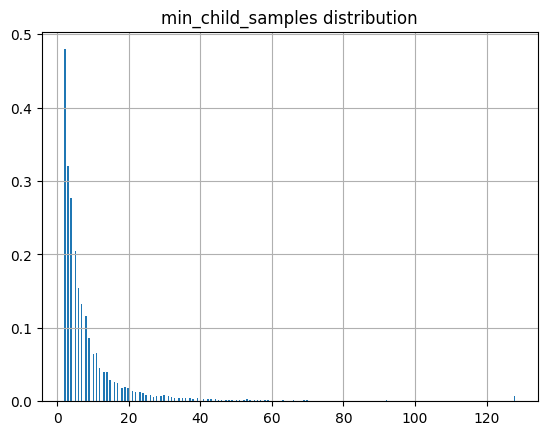

In [30]:
# plot distribution of min_child_samples
fig, ax = plt.subplots()
df['min_child_samples'].hist(bins=300, ax=ax, density=True)
plt.title("min_child_samples distribution")

(0.0, 30.0)

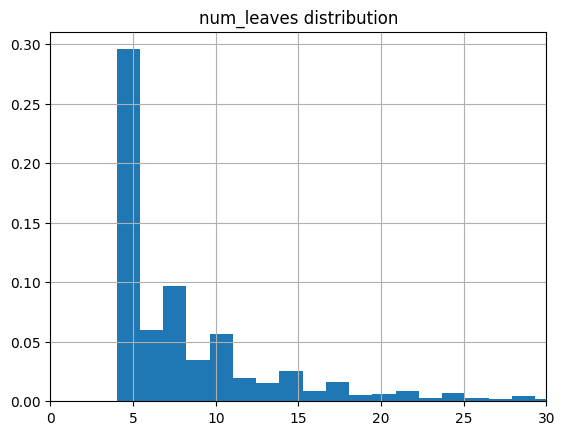

In [36]:
# plot distribution of min_child_samples
fig, ax = plt.subplots()
df['num_leaves'].hist(bins=500, ax=ax, density=True)
plt.title("num_leaves distribution")
# set xlimi from 0 to 30
plt.xlim(0, 30)

(0.0, 10.0)

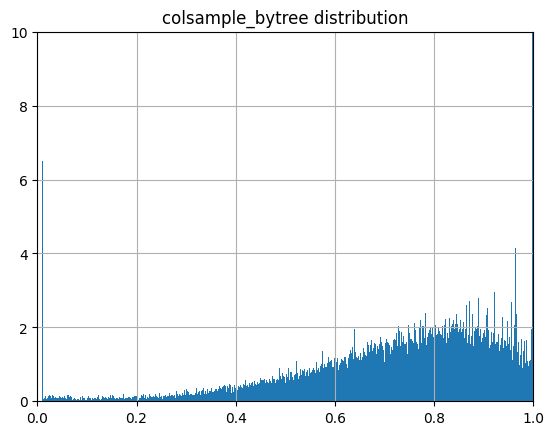

In [41]:
# plot distribution of min_child_samples
fig, ax = plt.subplots()
df['colsample_bytree'].hist(bins=500, ax=ax, density=True)
plt.title("colsample_bytree distribution")
# set xlimi from 0 to 30
plt.xlim(0, 1)
plt.ylim(0, 10)